### Content
#### The data contains the following information:

Country- this is the country for which the vaccination information is provided;
Country ISO Code - ISO code for the country;
Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative)  total;
Total number of vaccinations - this is the absolute number of total immunizations in the country;
Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
Number of vaccinations per day - number of daily vaccination for that day and country;
Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
Vaccines used in the country - total number of vaccines used in the country (up to date);
Source name - source of the information (national authority, international organization, local organization etc.);
Source website - website of the source of information;

Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Data reviewed on 26/03/21

In [2]:
covid_df=pd.read_csv(r"D:\country_vaccinations.csv")

In [3]:
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [4]:
covid_df.shape

(8079, 15)

In [5]:
covid_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [6]:
covid_df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3095
people_vaccinated                      3656
people_fully_vaccinated                5058
daily_vaccinations_raw                 3887
daily_vaccinations                      188
total_vaccinations_per_hundred         3095
people_vaccinated_per_hundred          3656
people_fully_vaccinated_per_hundred    5058
daily_vaccinations_per_million          188
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [7]:
covid_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.984000e+03,4.423000e+03,3.021000e+03,4.192000e+03,7.891000e+03,4984.000000,4423.000000,3021.000000,7891.000000
mean,2.597915e+06,2.073454e+06,8.933775e+05,9.203405e+04,6.096775e+04,10.006776,7.674486,3.656931,2698.877582
std,9.383280e+06,6.824277e+06,3.595095e+06,2.895602e+05,2.139143e+05,17.850345,12.074218,7.819018,4162.910710
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.045175e+04,3.677950e+04,1.901900e+04,2.738000e+03,1.025500e+03,0.790000,0.810000,0.410000,363.000000
50%,2.769620e+05,2.495550e+05,1.117160e+05,1.383850e+04,6.161000e+03,3.770000,3.210000,1.500000,1305.000000
75%,1.303350e+06,1.007708e+06,4.889370e+05,5.670225e+04,2.779400e+04,11.012500,8.590000,3.250000,3211.000000
max,1.304739e+08,8.547217e+07,4.636552e+07,4.575496e+06,2.541597e+06,162.020000,89.730000,72.290000,54264.000000


In [8]:
covid_df.corr()  #Correlations 

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.990222,0.947699,0.872864,0.941705,0.173412,0.187795,0.087036,0.116509
people_vaccinated,0.990222,1.000000,0.893817,0.880580,0.950694,0.173436,0.201103,0.058323,0.122699
people_fully_vaccinated,0.947699,0.893817,1.000000,0.787697,0.858930,0.129369,0.111169,0.145841,0.098552
daily_vaccinations_raw,0.872864,0.880580,0.787697,1.000000,0.938135,0.083927,0.096449,0.018723,0.087006
daily_vaccinations,0.941705,0.950694,0.858930,0.938135,1.000000,0.092051,0.106940,0.025903,0.050965
total_vaccinations_per_hundred,0.173412,0.173436,0.129369,0.083927,0.092051,1.000000,0.975644,0.927542,0.778710
people_vaccinated_per_hundred,0.187795,0.201103,0.111169,0.096449,0.106940,0.975644,1.000000,0.824050,0.816330
people_fully_vaccinated_per_hundred,0.087036,0.058323,0.145841,0.018723,0.025903,0.927542,0.824050,1.000000,0.718353
daily_vaccinations_per_million,0.116509,0.122699,0.098552,0.087006,0.050965,0.778710,0.816330,0.718353,1.000000


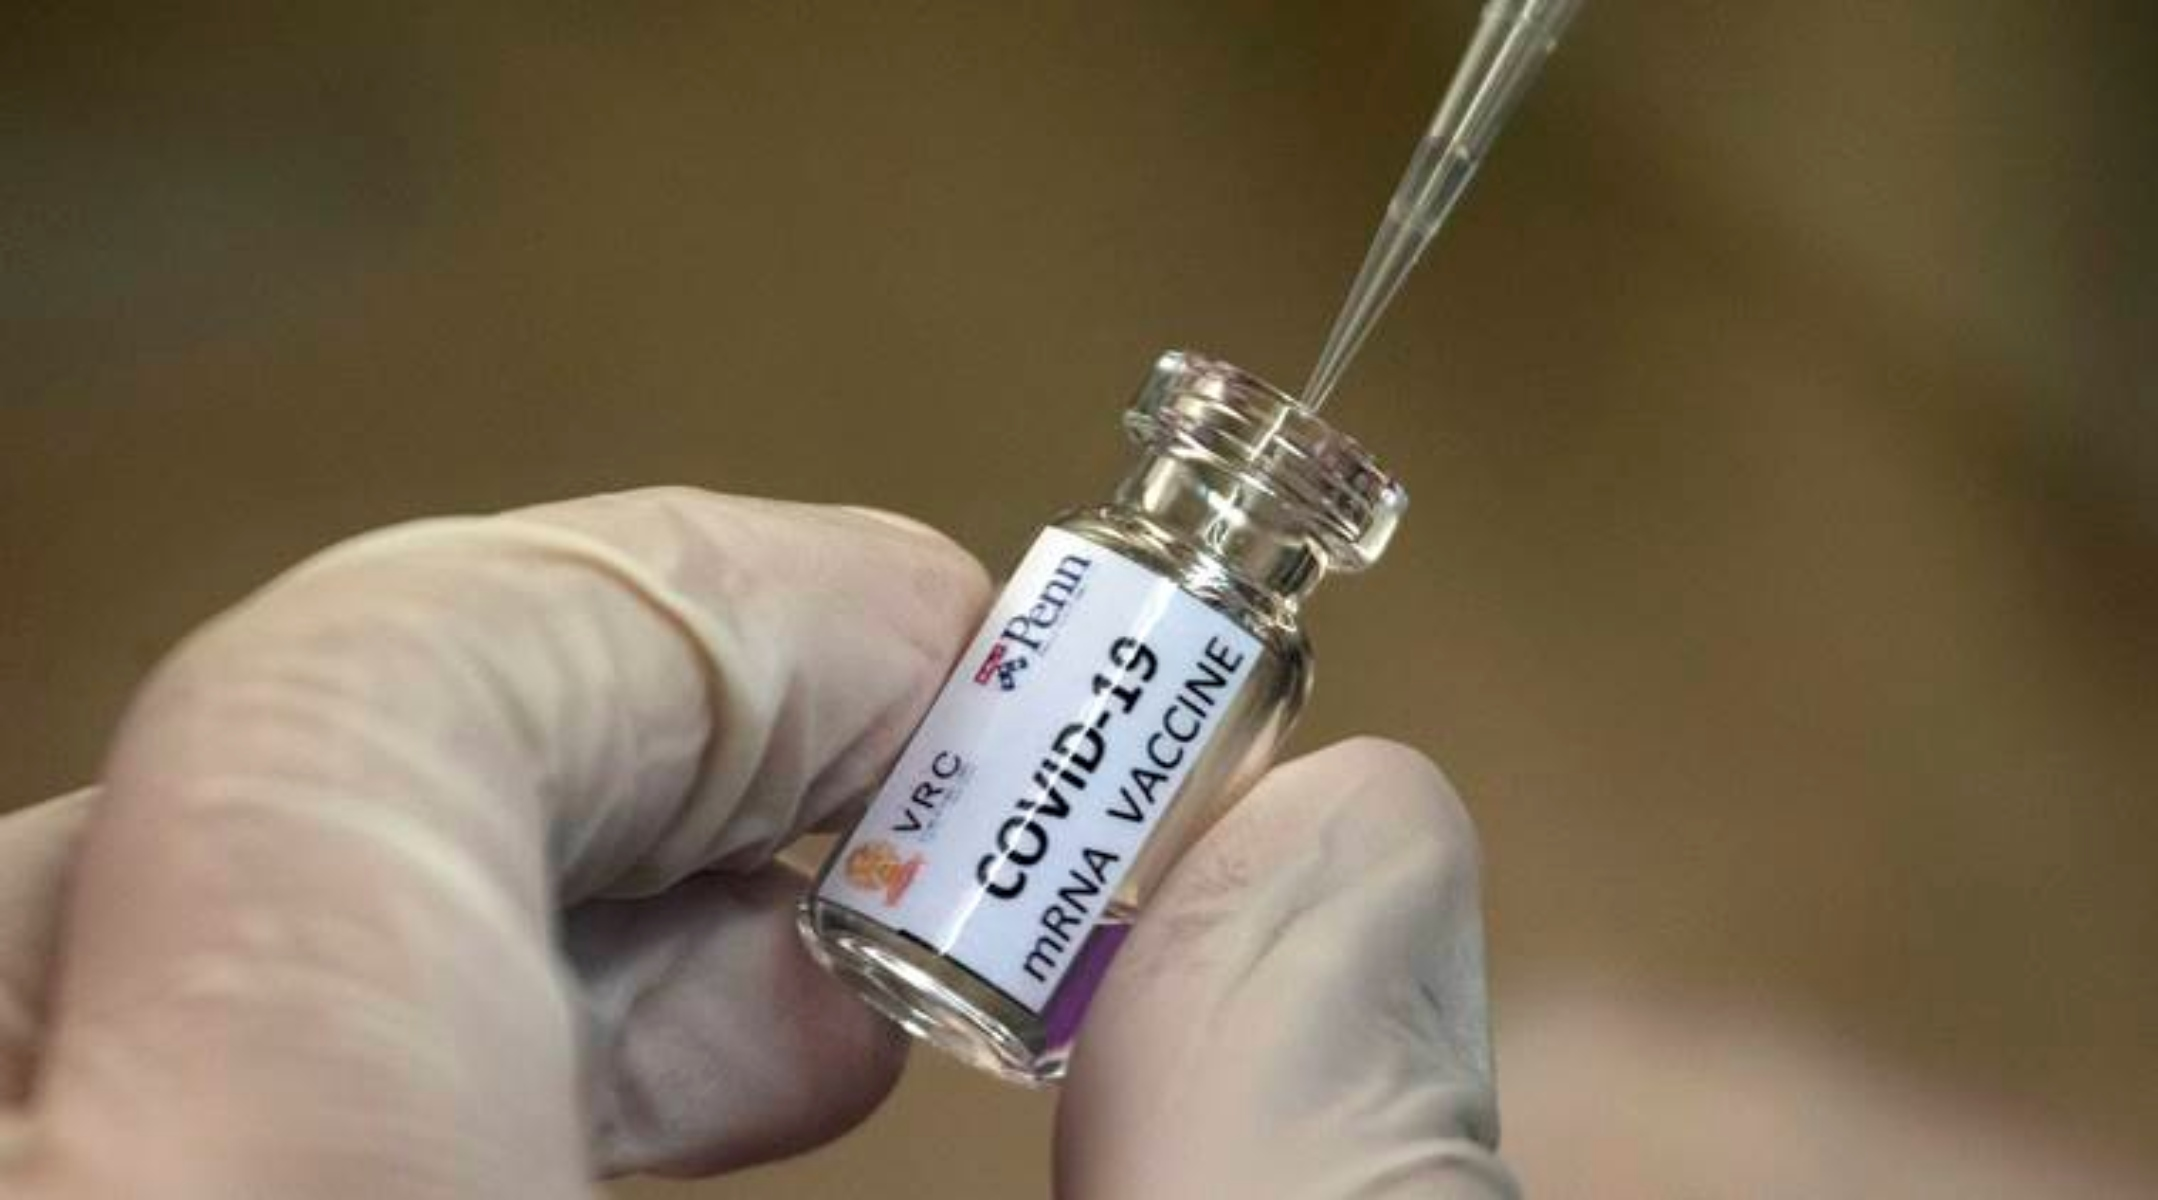

In [9]:
from IPython.display import Image
Image(filename=r"C:\Users\DELL\Downloads\vaccine image.jpg")

Text(0.5, 1.0, 'Country wise vaccination(total)')

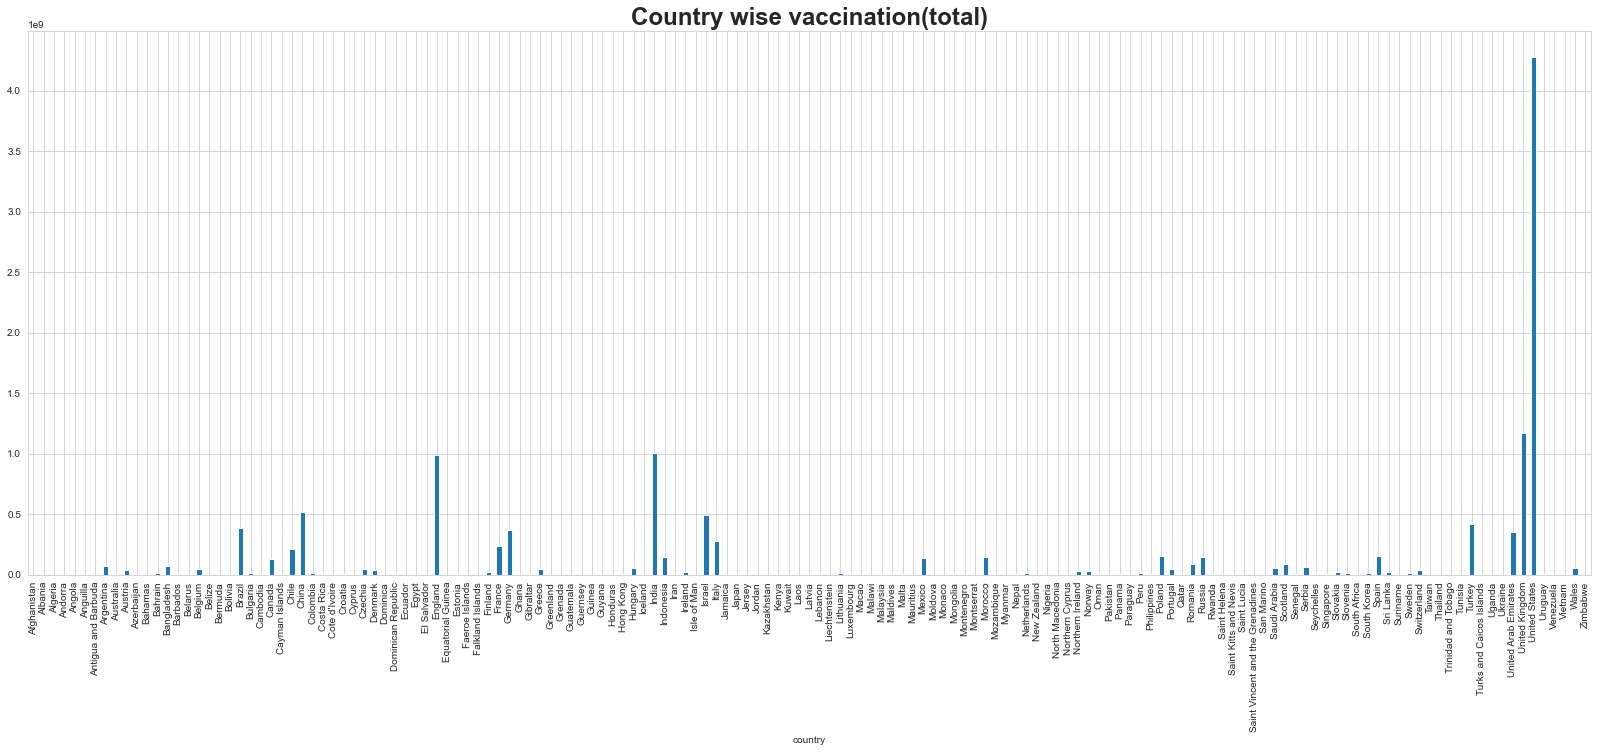

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(28,10))
covid_df.groupby('country').total_vaccinations.sum().plot(kind='bar')
plt.title('Country wise vaccination(total)',fontweight='bold',fontsize=24)

In [11]:
total_vac=covid_df.groupby('country').total_vaccinations.sum().to_frame() #Making dataframe called 'total_vac' from results obtained from groupby.
total_vac.columns=['total_vaccinations']
total_vac 

,total_vaccinations
country,
Afghanistan,62200.0
Albania,293745.0
Algeria,75030.0
Andorra,37758.0
Angola,142191.0
...,...
Uruguay,4522392.0
Venezuela,12351.0
Vietnam,329526.0


<Figure size 864x432 with 0 Axes>

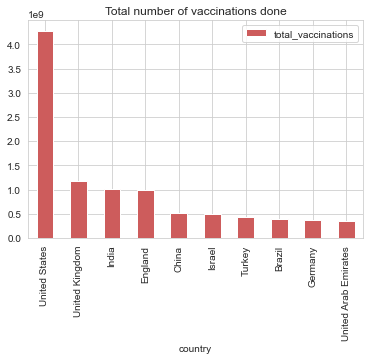

In [12]:
total_vac=total_vac.sort_values(by='total_vaccinations',ascending=False)  #Sorting the values of dataframe in descending order
#Plotting the first ten/top 10 values of the sorted dataframe.
plt.figure(figsize=(12,6))
total_vac[:10].plot(kind='bar',color='Indianred')
plt.title('Total number of vaccinations done')
plt.show()

In [13]:
#The top 10 countries according to the total number of vaccinations were done till now are displayed in the graph above and the top 3 are:
#USA
#UK
#India

In [14]:
#Total null values in total_vaccinations field are 3096,thus filling the null values with 0
covid_df['total_vaccinations'].fillna(0,inplace=True)

Text(0.5, 1.0, 'Total number of people vaccinated')

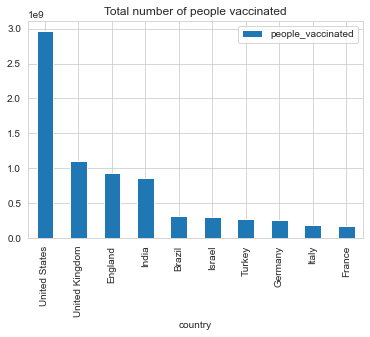

In [15]:
people_vac=covid_df.groupby('country').people_vaccinated.sum().to_frame()
people_vac=people_vac.sort_values(by='people_vaccinated',ascending=False)
people_vac[:10].plot(kind='bar')
plt.title('Total number of people vaccinated')

In [16]:
#The top 5 countries where people have been given at least one dose of covid vaccine are:
#1. USA
#2. UK
#3. England
#4. India
#5. Brazil

Text(0.5, 1.0, 'Countrywise total number of people fully vaccinated')

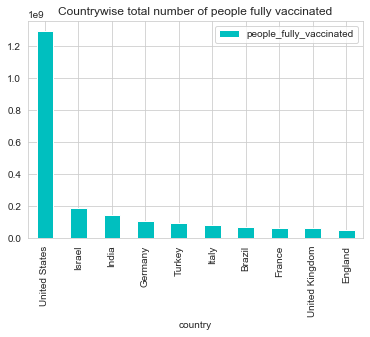

In [17]:
people_fully_vac=covid_df.groupby('country').people_fully_vaccinated.sum().to_frame()
people_fully_vac=people_fully_vac.sort_values(by='people_fully_vaccinated',ascending=False)
people_fully_vac[:10].plot(kind='bar',color='c')
plt.title('Countrywise total number of people fully vaccinated')

In [18]:
#The top 3 countries where people have been given the full dose of covid vaccine/have been completely vaccinated are:
#1. USA
#2. Israel
#3. India

Text(0.5, 1.0, 'Countrywise daily vaccinations')

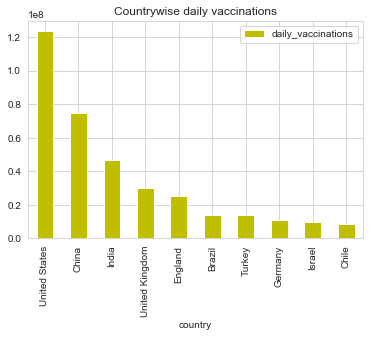

In [19]:
daily_vac=covid_df.groupby('country').daily_vaccinations.sum().to_frame()
daily_vac=daily_vac.sort_values(by='daily_vaccinations',ascending=False)
daily_vac[:10].plot(kind='bar',color='y')
plt.title('Countrywise daily vaccinations')

In [20]:
#The leading countries in terms of maximum number of covid vaccinations given daily:
#1. USA
#2. China
#3. India

Text(0.5, 1.0, 'Vaccine type (count)')

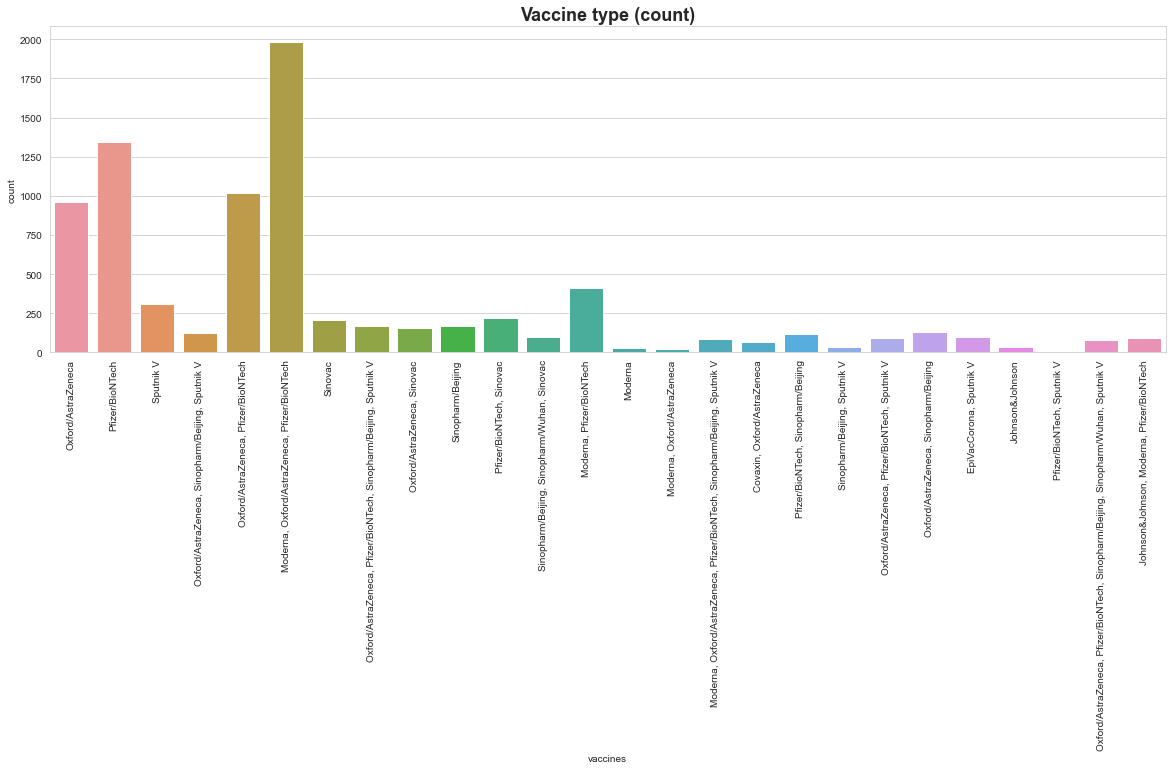

In [21]:
plt.figure(figsize=(20,6))
plot=sns.countplot(covid_df['vaccines'],orient='y')
plt.xticks(rotation=90)
plt.title('Vaccine type (count)',fontweight='bold',fontsize='18')

In [22]:
#Countrywise types of vaccines used
vac_type=covid_df.groupby('country').vaccines.unique().to_frame()
vac_type.style

,vaccines
country,
Afghanistan,['Oxford/AstraZeneca']
Albania,['Pfizer/BioNTech']
Algeria,['Sputnik V']
Andorra,['Pfizer/BioNTech']
Angola,['Oxford/AstraZeneca']
Anguilla,['Oxford/AstraZeneca']
Antigua and Barbuda,['Oxford/AstraZeneca']
Argentina,"['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']"
Australia,"['Oxford/AstraZeneca, Pfizer/BioNTech']"


Text(0.5, 1.0, 'Countrywise total vaccinations/hundred')

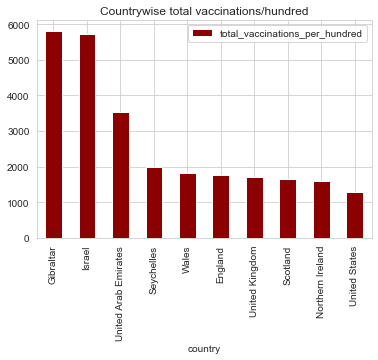

In [23]:
daily_vac=covid_df.groupby('country').total_vaccinations_per_hundred.sum().to_frame()
daily_vac=daily_vac.sort_values(by='total_vaccinations_per_hundred',ascending=False)
daily_vac[:10].plot(kind='bar',color='darkred')
plt.title('Countrywise total vaccinations/hundred')

Text(0.5, 1.0, 'Countrywise people vaccinated/hundred')

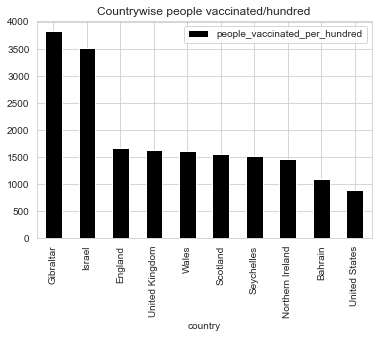

In [24]:
daily_vac=covid_df.groupby('country').people_vaccinated_per_hundred.sum().to_frame()
daily_vac=daily_vac.sort_values(by='people_vaccinated_per_hundred',ascending=False)
daily_vac[:10].plot(kind='bar',color='black')
plt.title('Countrywise people vaccinated/hundred')

Text(0.5, 1.0, 'Countrywise people fully vaccinated/hundred')

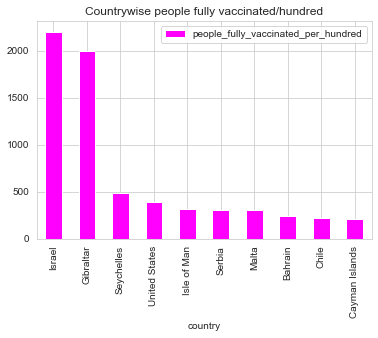

In [25]:
people_fully_vacc=covid_df.groupby('country').people_fully_vaccinated_per_hundred.sum().to_frame()
people_fully_vacc=people_fully_vacc.sort_values(by='people_fully_vaccinated_per_hundred',ascending=False)
people_fully_vacc[:10].plot(kind='bar',color='magenta')
plt.title('Countrywise people fully vaccinated/hundred')

Text(0.5, 1.0, 'Countrywise daily vaccinations per million')

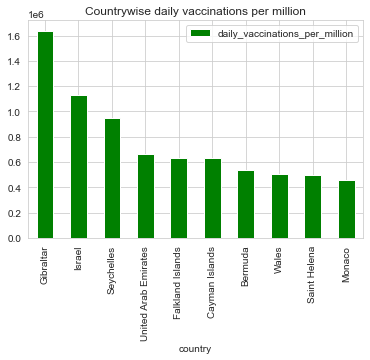

In [26]:
d=covid_df.groupby('country').daily_vaccinations_per_million.sum().to_frame()
d=d.sort_values(by='daily_vaccinations_per_million',ascending=False)
d[:10].plot(kind='bar',color='green')
plt.title('Countrywise daily vaccinations per million')

In [27]:
#From the 4 graphs obatined above, the countries that are conducting the vaccination program at a considerably faster pace are:
#ISRAEL - It has maximum number of people fully vaccinated per hundred.
#GIBRALTAR 
#Seychelles

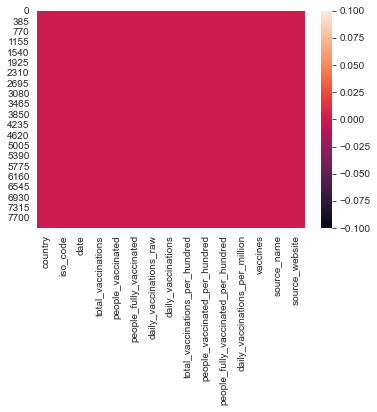

In [28]:
#Filling missing values of all the columns with 0 since only numerical values are missing.
covid_df.fillna(0,inplace=True)
sns.heatmap(covid_df.isnull()) #Checking through heatmap if there are any null values left.